# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


Step 2: Importing the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import random as rnd

Step 3: Creating random data for social media data
As we don't have access to propietary social media plateforms like instagram data.
n=500 is the size of entries in data dictionary. Can be any size for the dataset 

In [9]:
categories=["Food", "Travel", "Fashion", "Fitness", "Music", "Culture", "Family", "Health"]

data={'Date':pd.date_range('2023-01-01',periods=500),
     'Category': [rnd.choice(categories) for _ in range(500)],
     'Likes': np.random.randint(0,10000,size=500)}   

Step 4: Load the data into a Pandas DataFrame and Exploring the dataset

In [10]:
df=pd.DataFrame(data)
print(df)

          Date Category  Likes
0   2023-01-01  Fitness   9538
1   2023-01-02  Fashion   5872
2   2023-01-03   Health    935
3   2023-01-04     Food   6324
4   2023-01-05  Fashion   5595
..         ...      ...    ...
495 2024-05-10   Health   2038
496 2024-05-11   Travel   9376
497 2024-05-12   Health   9913
498 2024-05-13  Fashion   2962
499 2024-05-14  Culture   8826

[500 rows x 3 columns]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [15]:
df.describe()

,Likes
count,500.00000
mean,4912.40800
std,2916.74614
min,25.00000
25%,2372.50000
50%,4743.00000
75%,7520.25000
max,9956.00000


In [16]:
df.head()

,Date,Category,Likes
0,2023-01-01,Fitness,9538
1,2023-01-02,Fashion,5872
2,2023-01-03,Health,935
3,2023-01-04,Food,6324
4,2023-01-05,Fashion,5595


In [17]:
df.count()

Date        500
Category    500
Likes       500
dtype: int64

Step 5: Clean the data
dropna(inplace=True) is used for dropping rows with null values in the original dataframe
fillna() allows to replace empty cell with a value

In [18]:
df.dropna(inplace=True)
df.count()

Date        500
Category    500
Likes       500
dtype: int64

#converting the df 'date' field into date format so as to make sure all cell in this field follow the same format

pd.to_numeric: This function converts argument to a numeric type.
downcast='integer': This parameter is used to downcast the resulting data to the smallest possible integer subtype.

In [34]:
df['Date']=pd.to_datetime(df['Date'])
df['Likes']=pd.to_numeric(df['Likes'], downcast='integer')
print(df)
df.info()

          Date Category  Likes
0   2023-01-01  Fitness   9538
1   2023-01-02  Fashion   5872
2   2023-01-03   Health    935
3   2023-01-04     Food   6324
4   2023-01-05  Fashion   5595
..         ...      ...    ...
495 2024-05-10   Health   2038
496 2024-05-11   Travel   9376
497 2024-05-12   Health   9913
498 2024-05-13  Fashion   2962
499 2024-05-14  Culture   8826

[500 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 32.7+ KB


Step 6: Visualize the data

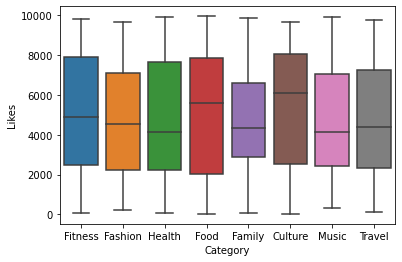

In [32]:
sbn.boxplot(x='Category', y='Likes', data=df)
plt.show()

In [40]:
category_likes=df.groupby('Category')['Likes'].mean()
print(category_likes)

Category
Culture    5323.981818
Family     4876.677966
Fashion    4575.880597
Fitness    5118.396552
Food       5122.469697
Health     4751.886792
Music      4795.623188
Travel     4813.410959
Name: Likes, dtype: float64


In [41]:
df['Likes'].mean()

4912.408